In [1]:
# [https://www.scribbr.com/statistics/levels-of-measurement/]
# [https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/]

In [2]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import pylab
from scipy import stats
from scipy.stats import ttest_ind

import statsmodels.api as sm
import statsmodels.stats.stattools as stt
import statsmodels.stats.diagnostic as di

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split

## Step 1: Reading and Understanding the Data

Use Pandas and read the housing dataset

In [3]:
### reading data csv
df = pd.read_csv('housing.csv')

In [4]:
### Dimensions of the dataset is 2413 rows and 18 columns
df.shape

(2413, 18)

In [5]:
### To check all the columns name
df.columns

Index(['Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Cond',
       'Year_Built', 'Exter_Cond', 'Total_Bsmt_SF', 'First_Flr_SF',
       'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price'],
      dtype='object')

In [6]:
### Check for the duplicate rows

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price


#### Observation:
- No duplicate rows found

In [7]:
### Null value percentage check

df.isna().mean()

Lot_Frontage     0.0
Lot_Area         0.0
Bldg_Type        0.0
House_Style      0.0
Overall_Cond     0.0
Year_Built       0.0
Exter_Cond       0.0
Total_Bsmt_SF    0.0
First_Flr_SF     0.0
Second_Flr_SF    0.0
Full_Bath        0.0
Half_Bath        0.0
Bedroom_AbvGr    0.0
Kitchen_AbvGr    0.0
Fireplaces       0.0
Longitude        0.0
Latitude         0.0
Sale_Price       0.0
dtype: float64

#### Observation:
- No Null value obsevred in any column

In [8]:
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

In [10]:
df.describe()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,55.462495,10060.208040,1969.436386,1022.827600,1133.857024,339.242851,1.539163,0.377953,2.854538,1.040199,0.602984,-93.642391,42.033730,175567.643183
std,33.542416,8222.759854,29.487943,408.977848,366.442470,423.198488,0.544667,0.498467,0.813430,0.200642,0.648911,0.026159,0.018015,70979.614441
min,0.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.693153,41.986498,35000.000000
25%,37.000000,7390.000000,1953.000000,784.000000,866.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,-93.661562,42.021547,129500.000000
50%,60.000000,9360.000000,1971.000000,970.000000,1060.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,-93.640326,42.034569,159000.000000
75%,77.000000,11404.000000,1998.000000,1246.000000,1350.000000,704.000000,2.000000,1.000000,3.000000,1.000000,1.000000,-93.621485,42.047997,206900.000000
max,313.000000,215245.000000,2010.000000,3206.000000,3820.000000,1872.000000,4.000000,2.000000,6.000000,3.000000,4.000000,-93.577427,42.063381,755000.000000


#### Observation:
- Possibility of outliers to occure in 'Lot_Frontage', 'Lot_Area', and 'Sale_Price' after observing gap between 75th percentile and Max value.

## Step 2: Visualising the Data
- Analysis of Target variable
- Here's where Author will also identify if some predictors directly have a strong association with the outcome variable.
- Analyze distribution of independent variables.
- Author will check the possibility of outliers lies in variables.
- Author will identify the level of measurement for each variable.

Visualization will be done using `matplotlib` and `seaborn`.

### Analysing Target Variable 
- By plotting the distribution of Sales_Price, check if Sales_Price comes from Normal Distribution or not

<Axes: xlabel='Sale_Price', ylabel='Count'>

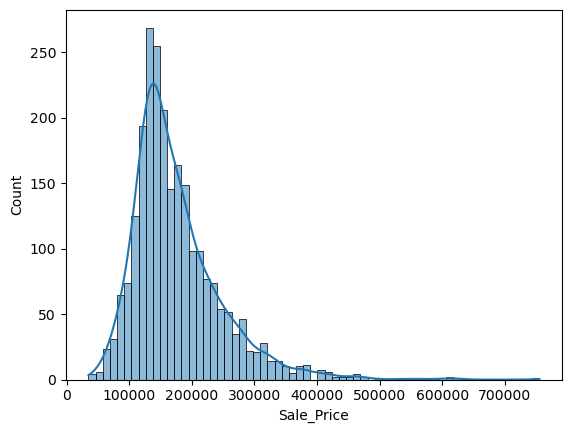

In [11]:
sns.histplot(df['Sale_Price'],kde=True)

((array([-3.44340978, -3.19582455, -3.05869451, ...,  3.05869451,
          3.19582455,  3.44340978]),
  array([ 35000,  39300,  40000, ..., 615000, 625000, 755000], dtype=int64)),
 (66773.93972058351, 175567.64318276005, 0.9397409893171943))

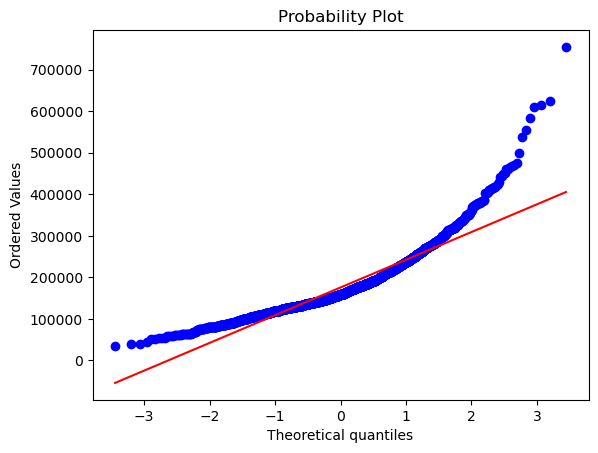

In [12]:
stats.probplot(df['Sale_Price'], dist="norm", plot=pylab)

### Observation:
- The target variable which is in this case Sales_Price has a one-tailed positively skewed or right skewed distribution
- Possibility of outlier
- Sale_Price can be categorized, ranked, evenly spaced and has natural zeros in it comes in Ratio Level

### Continues Variable Analysis using Pair plot

C:\Users\Sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


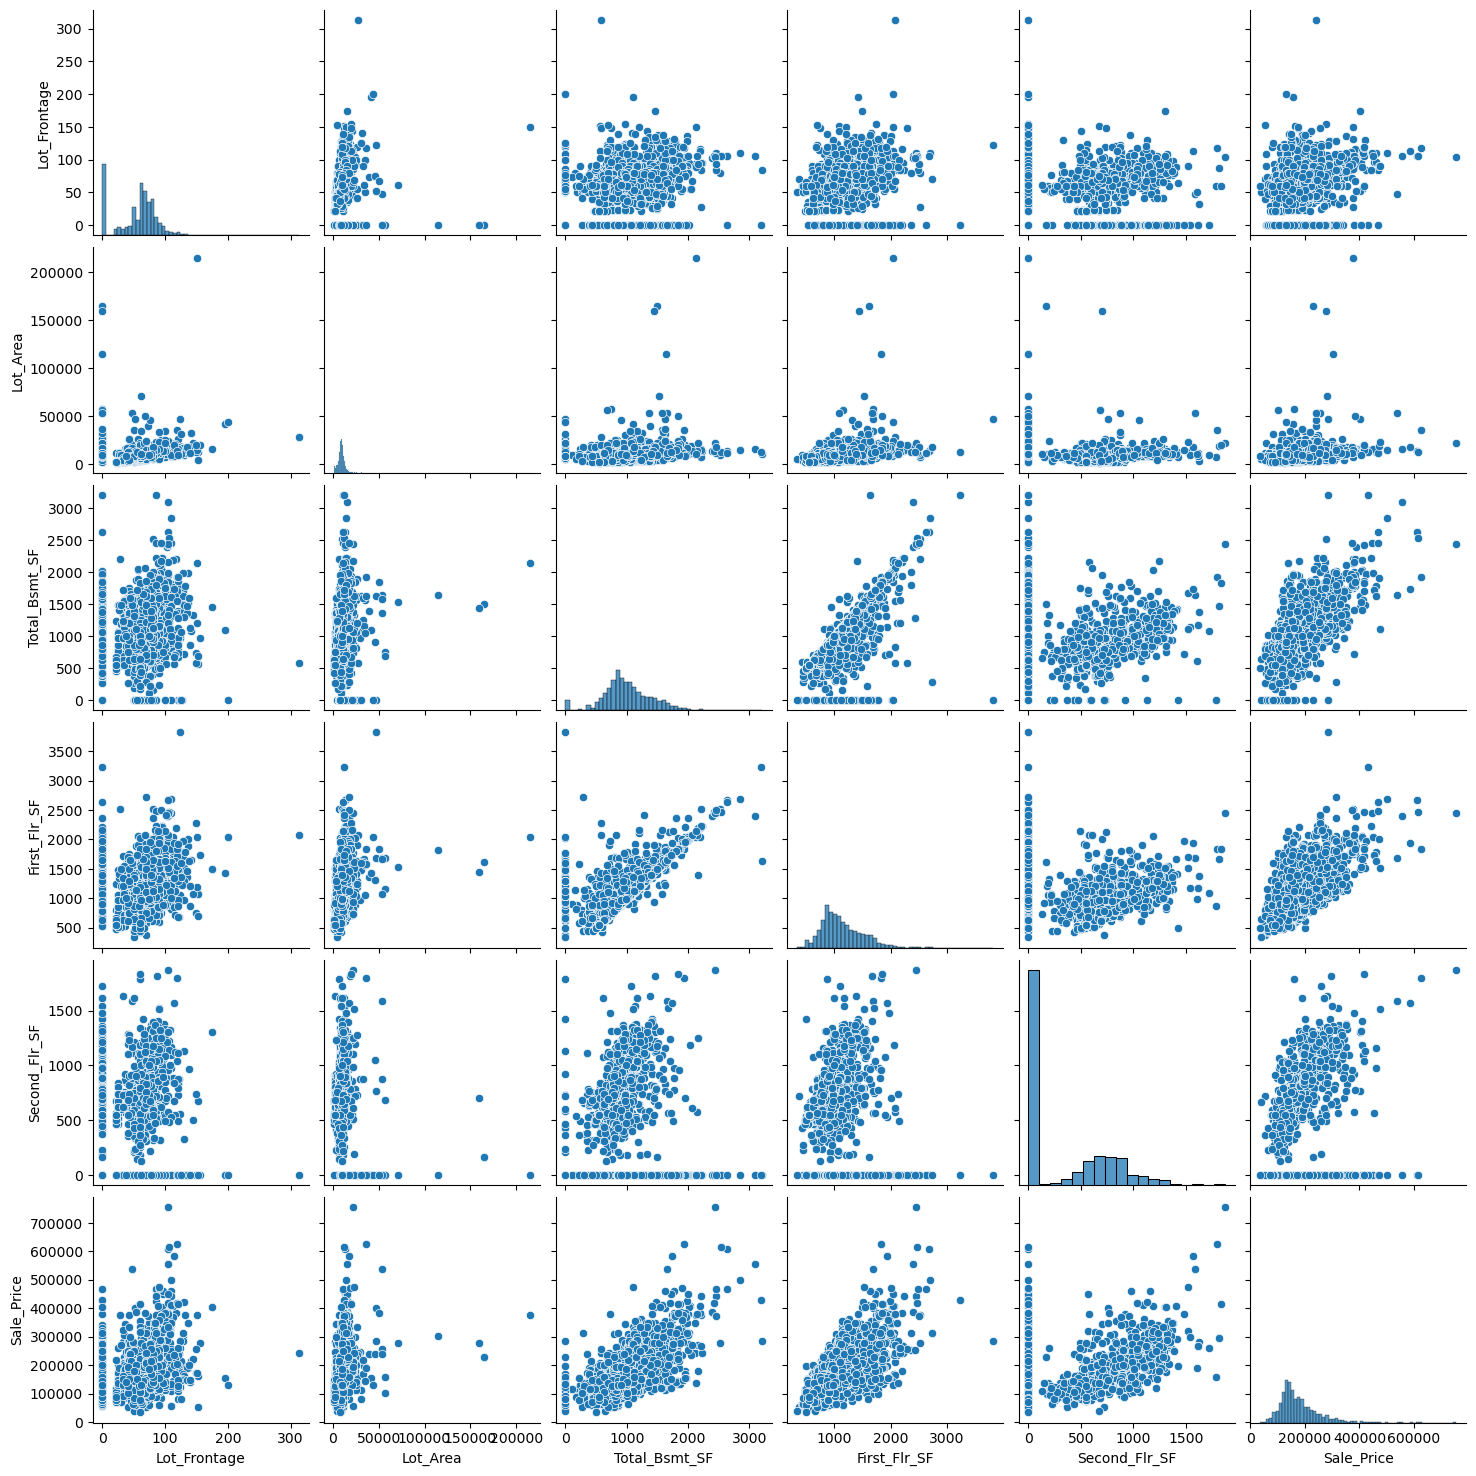

In [13]:
### Lot_frontage, Total_Bsmt_SF, Lot_Area, First_Flr_SF, and Second_Flr_SF express the amount of area available inside as well as outside the House
### Lets check the association of the variables with target variable

sns.pairplot(df[['Lot_Frontage','Lot_Area','Total_Bsmt_SF','First_Flr_SF','Second_Flr_SF','Sale_Price']])

### Observation:
- Positive linear association of Independent variables and Target variable has been observed.
- Strong association observed between First_Flr_SF and Total_Bsmt_SF been observed.
- Skewness of data is been observed in Lot_frontage,Lot_Area, Total_Bsmt_SF, First_Flr_SF, and Second_Flr_SF

C:\Users\Sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


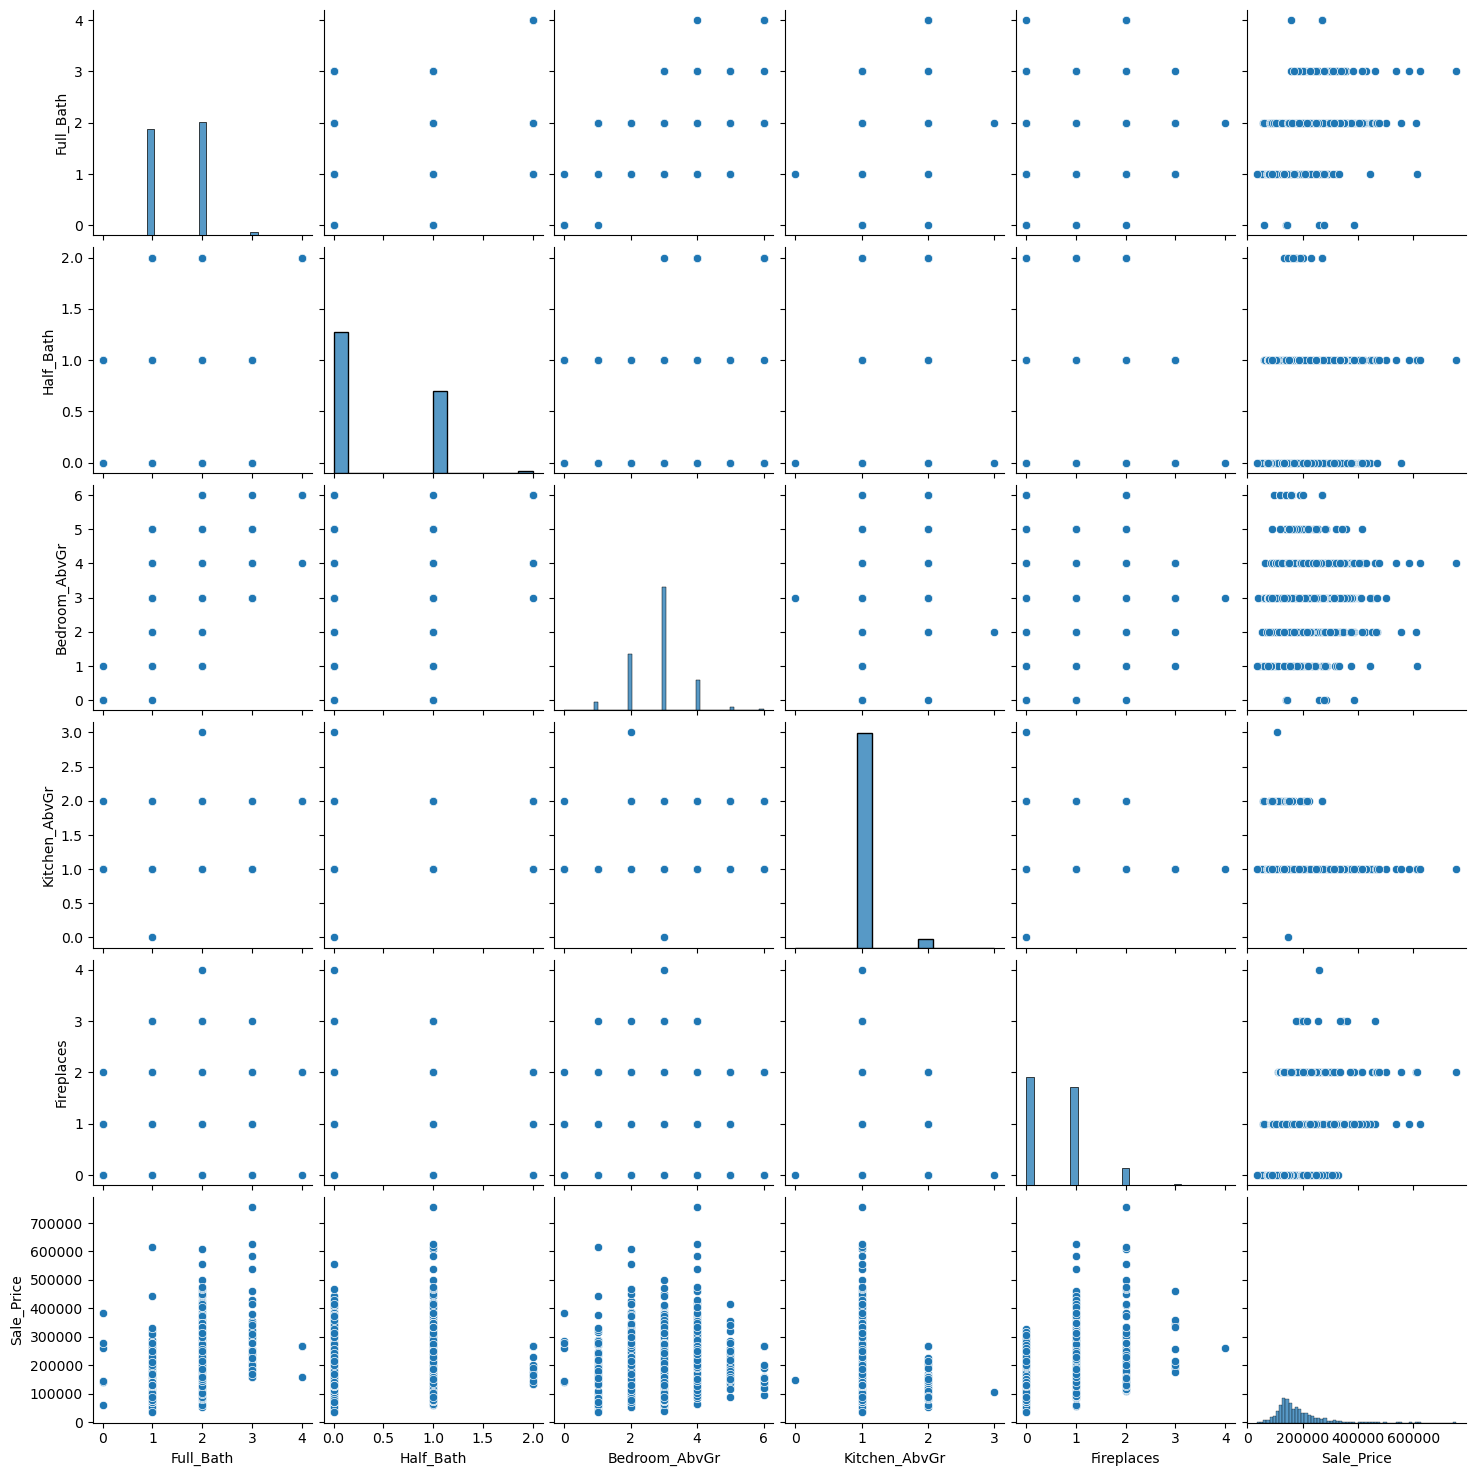

In [14]:
### 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', and 'Fireplaces', express the number of rooms available in the House
### Lets check the association of the variables with target variable

sns.pairplot(df[['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr','Fireplaces','Sale_Price']])

### Observation:
- Slight positive linear association of Independent variables and Target variable has been observed.

<Axes: xlabel='Year_Built', ylabel='Sale_Price'>

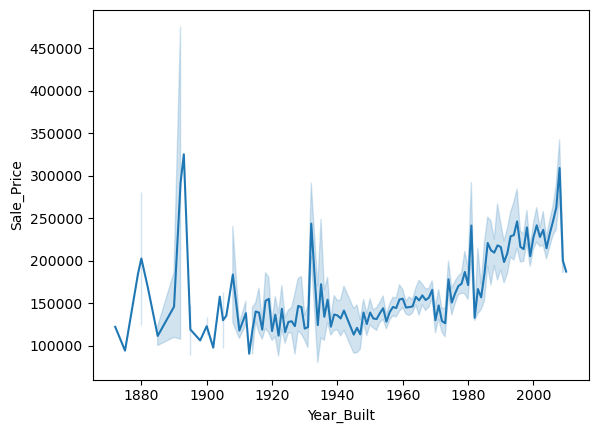

In [15]:
### Year_Built describes the time frame 
### Check the association with Target variable
sns.lineplot(x='Year_Built', y='Sale_Price', data=df)

### Observation:
- As Years are passing Sale_price is also Positively increasing
- Year_Built has a level of Measurement of Interval Type

C:\Users\Sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


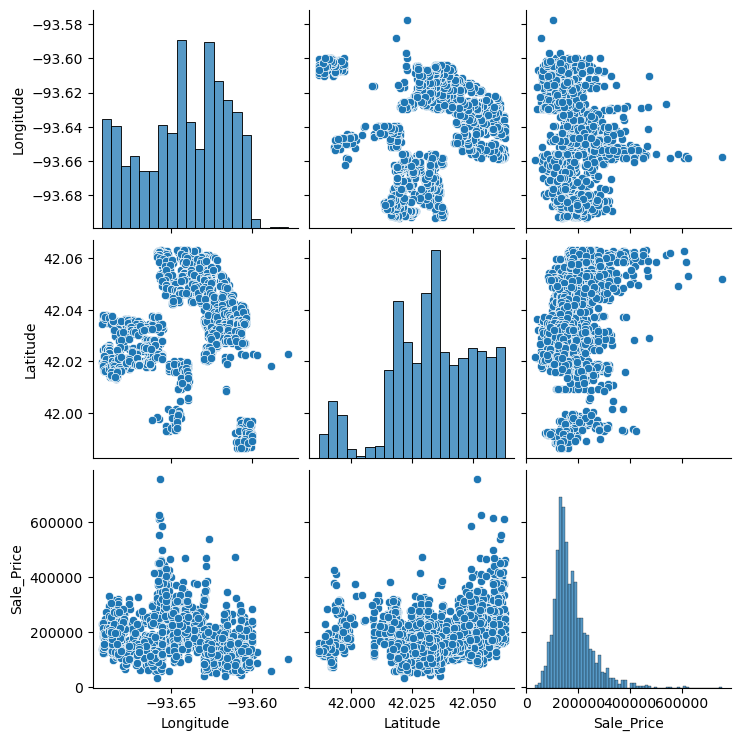

In [16]:
### 'Longitude' and 'Latitude' describes the location of house.
### Lets check the association of both variables with target variable

sns.pairplot(df[['Longitude', 'Latitude','Sale_Price']])

### Observation:
- No association been observed between Longitude, Latitude and Sale_Price

### Visulization of Categorical variables using Barplot and Boxplot

<Axes: xlabel='Bldg_Type'>

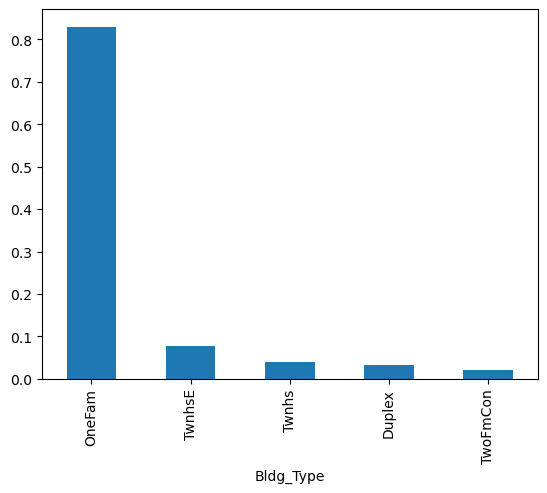

In [17]:
df.Bldg_Type.value_counts(normalize=True).plot.bar()

### Observation:
- OneFam is dominating the category by 80% of data points
- Bldg_Type is a Categorical Oridinal type

<Axes: xlabel='House_Style'>

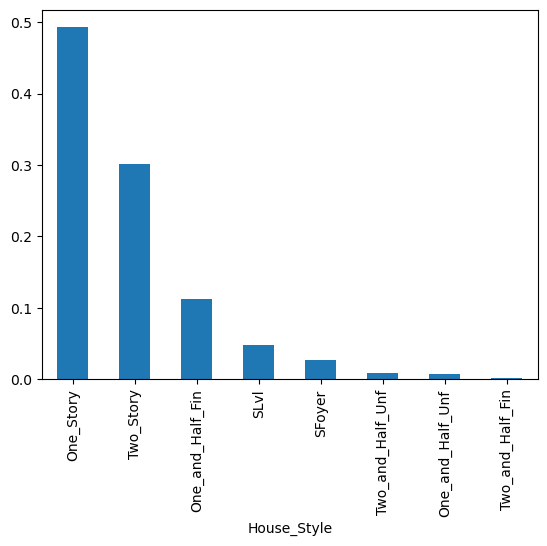

In [18]:
df.House_Style.value_counts(normalize=True).plot.bar()

### Observation:
- Almost 50% of data points comes under One_Story
- House_Style is a Categorical Oridinal type

<Axes: xlabel='Overall_Cond'>

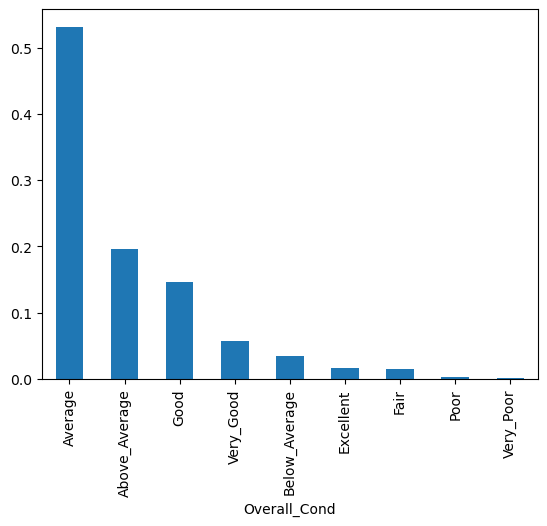

In [19]:
df.Overall_Cond.value_counts(normalize=True).plot.bar()

### Observation:
- More than 50% of data points comes under Average overall condition.
- Overall_Cond is a Categorical Oridinal type

<Axes: xlabel='Exter_Cond'>

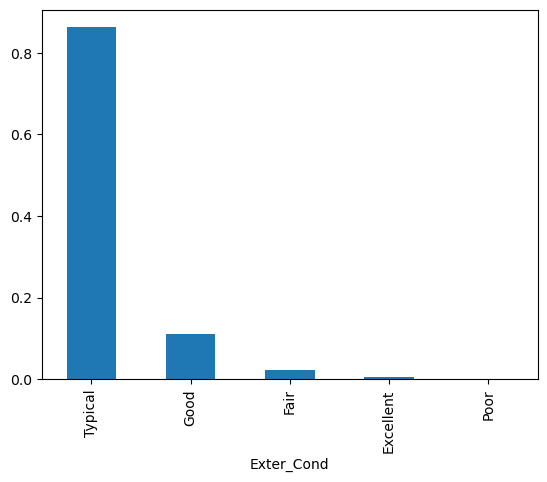

In [20]:
df.Exter_Cond.value_counts(normalize=True).plot.bar()

### Observation:
- Close to 90% of data points comes under Typical External condition.
- Exter_Cond is a Categorical Oridinal type

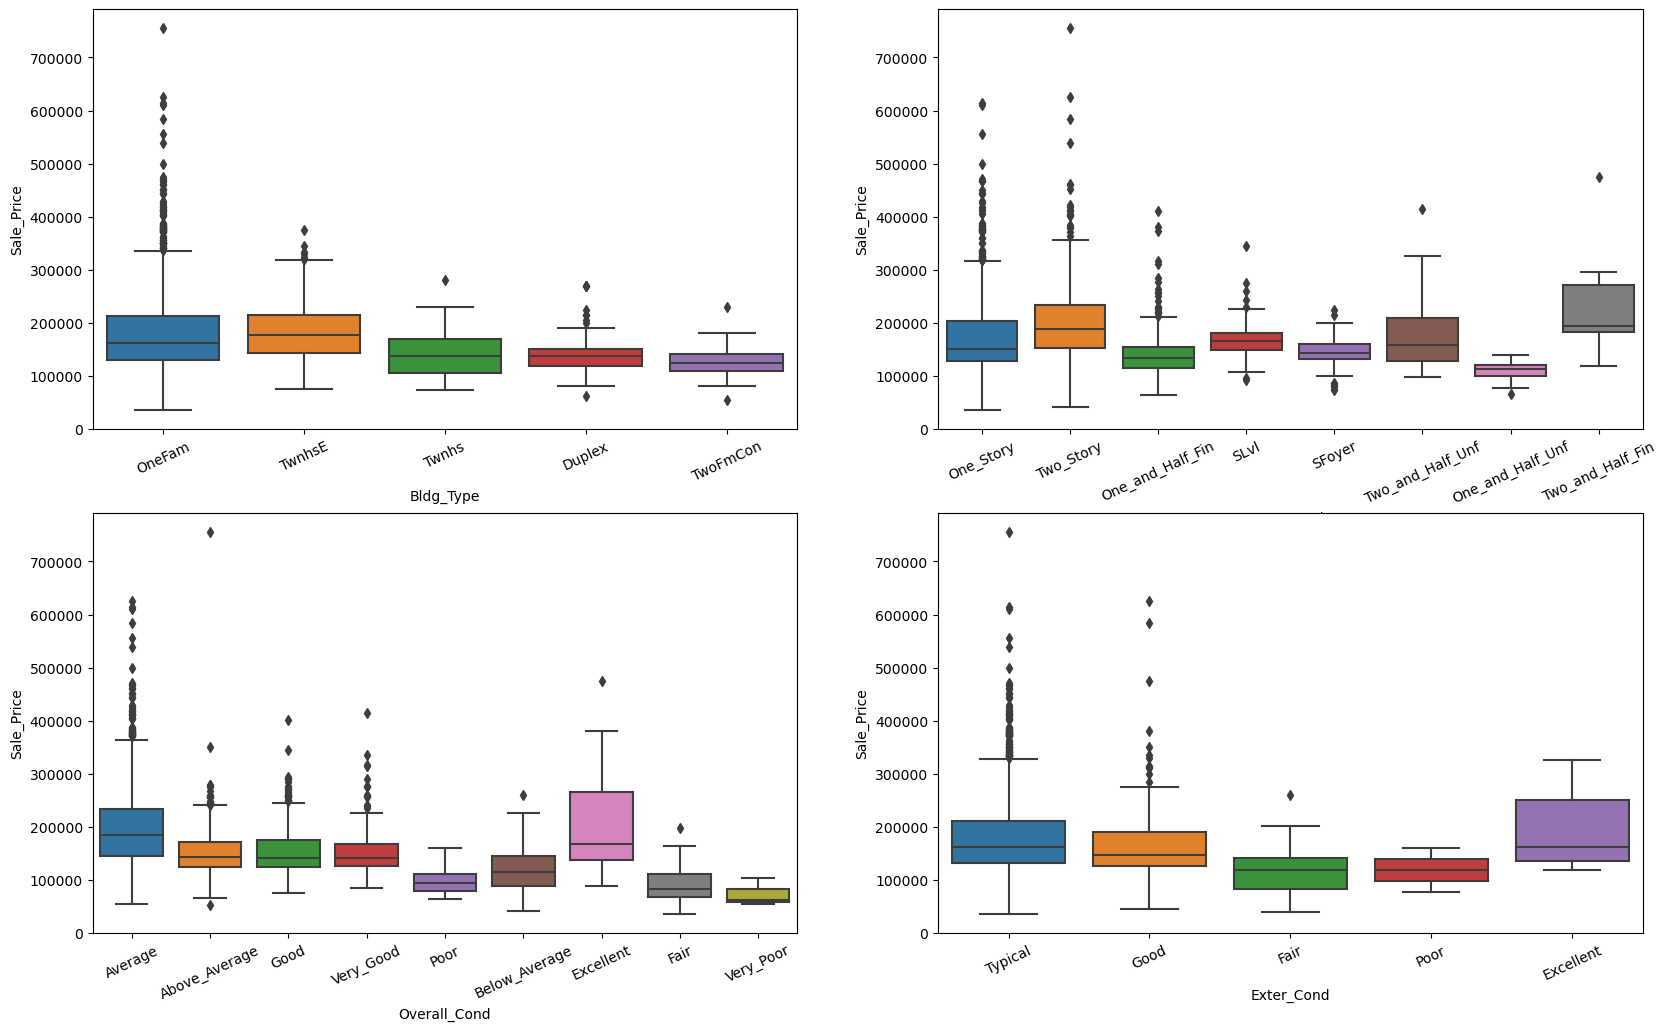

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Bldg_Type', y = 'Sale_Price', data = df)
plt.xticks(rotation = 25)
plt.subplot(2,2,2)
sns.boxplot(x = 'House_Style', y = 'Sale_Price', data = df)
plt.xticks(rotation = 25)
plt.subplot(2,2,3)
sns.boxplot(x = 'Overall_Cond', y = 'Sale_Price', data = df)
plt.xticks(rotation = 25)
plt.subplot(2,2,4)
sns.boxplot(x = 'Exter_Cond', y = 'Sale_Price', data = df)
plt.xticks(rotation = 25)
plt.show()

### Observations:
- Overlaps in Medians been observed in Bldg_Type and Exter_Cond which denotes weak association with Sale_price
- Differences in Medians been observed in House_Style and Overall_Cond which denotes good association with Sale_price

## Step 3: Data Preparation

- Outlier Handling
- Normalize Lot_frontage,Lot_Area, Total_Bsmt_SF, First_Flr_SF, and Second_Flr_SF with suitable tranformation method
- Normalize the Target variable using Log-normal transformation
- Reducing cardinality of Categorical variable
- Encode Categorical Variables with Pandas get_dummies method

### Outlier Handling

#### Outlier Handling with Z-Score
- Based on Scatterplot of each continues varibale author observed outliers in Sale_Price, Second_Flr_SF, First_Flr_SF, Total_Bsmt_SF, Lot_Area, Fireplaces, Kitchen_AbvGr,and Lot_Frontage
- Let's analyze Outliers by observing Z-score and Scatterplot

In [22]:
#### Let first analyze outlier handling with Z-score method
z = np.abs(stats.zscore(df[['Sale_Price','Second_Flr_SF','First_Flr_SF','Total_Bsmt_SF','Lot_Area','Lot_Frontage',
                            'Fireplaces','Kitchen_AbvGr','Bedroom_AbvGr','Half_Bath','Full_Bath']]))
print(z)

      Sale_Price  Second_Flr_SF  First_Flr_SF  Total_Bsmt_SF  Lot_Area  \
0       0.555660       0.801783      1.425193       0.139822  2.640755   
1       0.994402       0.801783      0.649232       0.344412  0.189975   
2       0.050273       0.801783      0.532644       0.748783  0.511709   
3       0.964313       0.801783      2.664389       2.658818  0.133777   
4       0.201964       0.854994      0.561888       0.231913  0.458553   
...          ...            ...           ...            ...       ...   
2408    0.465972       0.801783      0.357175       0.048491  0.258265   
2409    0.628024       0.801783      0.632855       0.388433  0.142951   
2410    0.613932       0.801783      0.447249       0.271043  0.046319   
2411    0.078456       0.801783      0.696415       0.895521  0.006107   
2412    0.175190       1.571118      0.376282       0.065610  0.052695   

      Lot_Frontage  Fireplaces  Kitchen_AbvGr  Bedroom_AbvGr  Half_Bath  \
0         2.550658    2.153308      

In [23]:
threshold = 3
filtered_entries = (z<3).all(axis=1)
z_score_df = df[filtered_entries].copy()

In [24]:
difference = df.shape[0]-z_score_df.shape[0]
print('Number of rows removed after applying Z-score method are', difference)

Number of rows removed after applying Z-score method are 185


### Observation:
- As size of data is 2413 rows then loosing 185 rows might lose some amount of information which is not affordable.

### Outlier Handling with Scatter Plot

In [25]:
#### Make a copy of original dataset before making any alteration
df_copy = df.copy()

<Axes: xlabel='Lot_Area', ylabel='Sale_Price'>

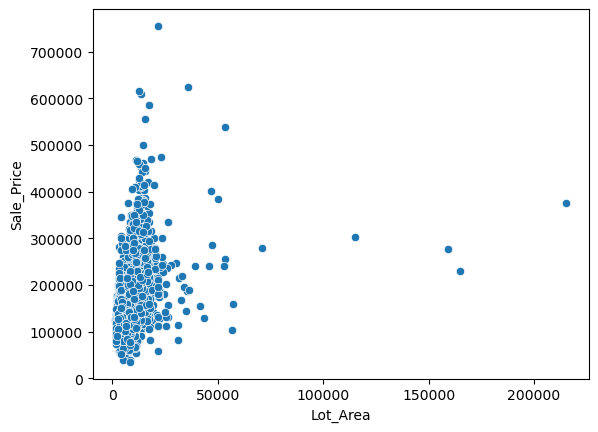

In [26]:
sns.scatterplot(data=df_copy, x='Lot_Area', y='Sale_Price')

### Observation:
- As area of house crossed 60,000 sqft. with sale price under approx. 350000 few data points are considerably on distance from rest of data points therefore they can be safe to remove.

In [27]:
df_copy = df_copy[df_copy['Lot_Area']<60000].copy()

<Axes: xlabel='Lot_Frontage', ylabel='Sale_Price'>

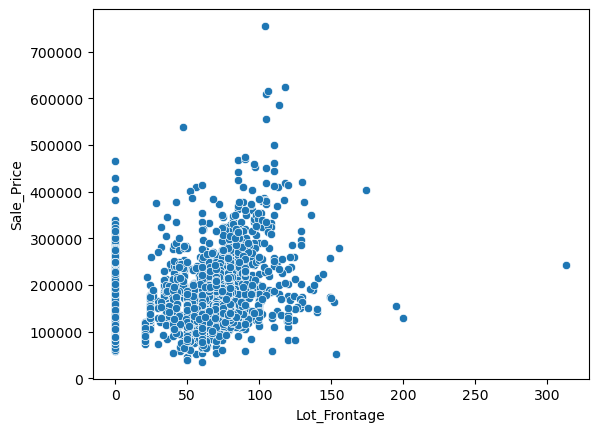

In [28]:
sns.scatterplot(data=df_copy, x='Lot_Frontage', y='Sale_Price')

### Observation:
- Single data-point above 200 Lot_Frontage with Sale price under 300000 is vast distance from rest of datapoints so it can be removed.

In [29]:
df_copy = df_copy[df_copy['Lot_Frontage']<200].copy()

<Axes: xlabel='First_Flr_SF', ylabel='Sale_Price'>

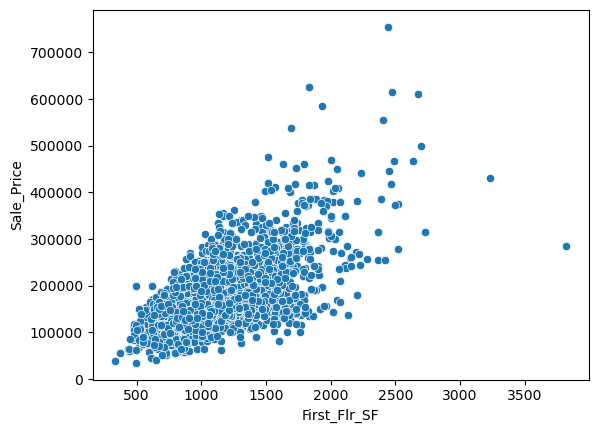

In [30]:
sns.scatterplot(data=df_copy, x='First_Flr_SF', y='Sale_Price')

### Observation:
- Few data-points above 3000 First_FIr_SF with Sale price under 450000 are distant from rest of datapoints so it can be removed.
- In First_FIr_SF, Lot_Area,and Lot_Frontage it will be safe remove single data point crossing sale price 700000.

In [31]:
df_copy = df_copy[(df_copy['First_Flr_SF']<3000)&(df_copy['Sale_Price']<700000)]

<Axes: xlabel='Total_Bsmt_SF', ylabel='Sale_Price'>

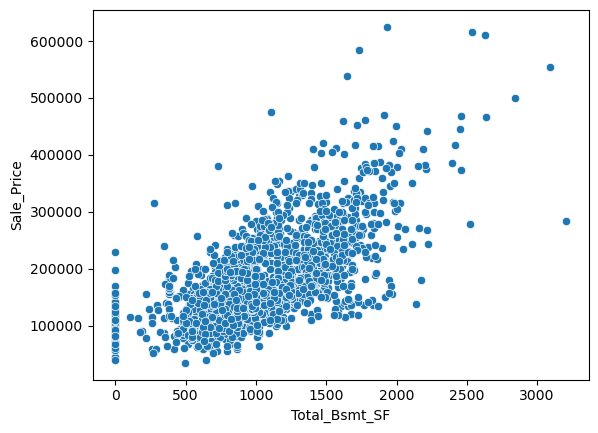

In [32]:
sns.scatterplot(data=df_copy, x='Total_Bsmt_SF', y='Sale_Price')

### Observation:
- Single data point crossing 3000 in Total_FIr_SF with Sale price near 300000 are distant from rest of datapoints so it can be removed.

In [33]:
df_copy = df_copy[(df_copy['Total_Bsmt_SF']<3000)]

<Axes: xlabel='Full_Bath', ylabel='Sale_Price'>

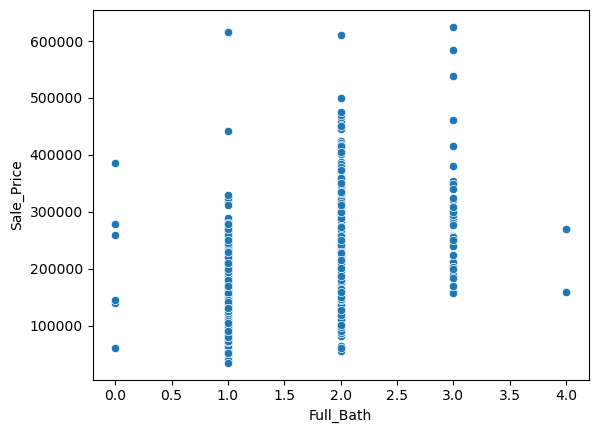

In [34]:
sns.scatterplot(data=df_copy, x='Full_Bath', y='Sale_Price')

### Observation:
- Very few data points been observed in more than 3 full_bath with less Sale_Price so these points are safe to remove

In [35]:
df_copy=df_copy[(df_copy['Full_Bath']<=3)]

<Axes: xlabel='Kitchen_AbvGr', ylabel='Sale_Price'>

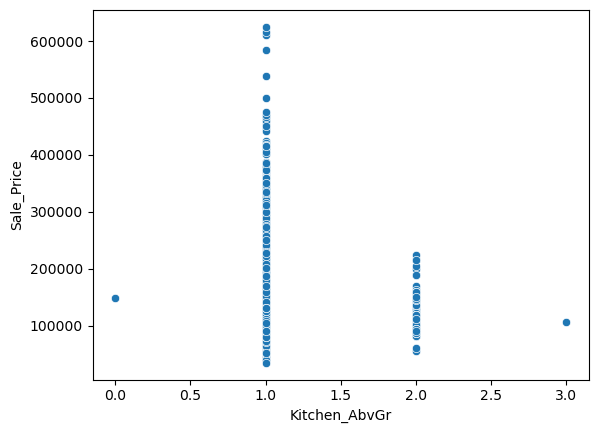

In [36]:
sns.scatterplot(data=df_copy, x='Kitchen_AbvGr', y='Sale_Price')

### Observation:
- Very one data points been observed in more than 2 and at 0th postion in Kitchen_AbvGr with less Sale_Price so these points are safe to remove

In [37]:
df_copy = df_copy[(df_copy['Kitchen_AbvGr']<=2) | (df_copy['Kitchen_AbvGr']!=0)]

<Axes: xlabel='Fireplaces', ylabel='Sale_Price'>

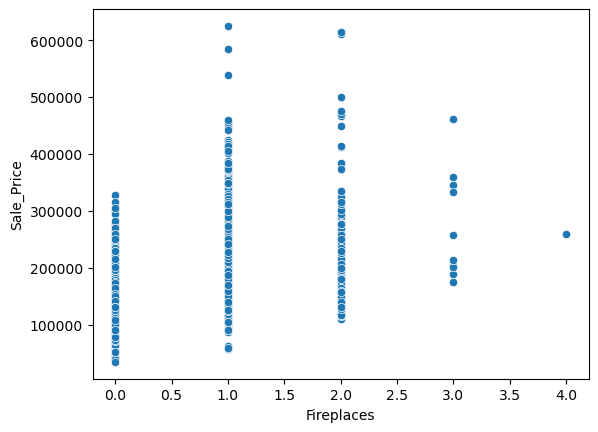

In [38]:
sns.scatterplot(data=df_copy, x='Fireplaces', y='Sale_Price')

### Observation:
- Single data points been observed in more than 3 Fireplaces with less Sale_Price so these points are safe to remove

In [39]:
df_copy = df_copy[(df_copy['Fireplaces']<=3)]

In [40]:
print('Number of rows removed after analyzing Scatter Plot are', df.shape[0]-df_copy.shape[0])

Number of rows removed after analyzing Scatter Plot are 17


### Conclusion
- Author will go forward with Scatter Plot method as amount of data preserved after handling outlier is very good.

### Normalizing Skewed Variables using Numpy Log-normal method

<Axes: xlabel='Lot_Area', ylabel='Count'>

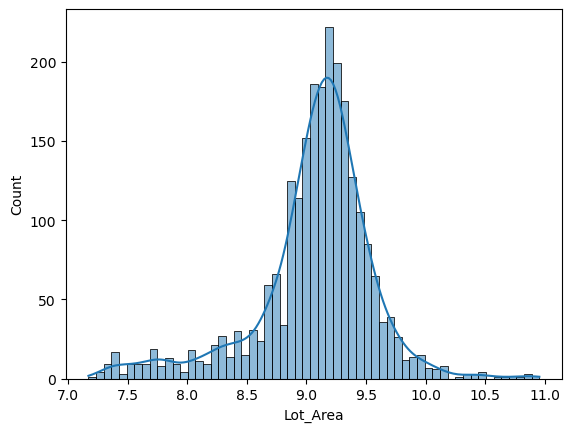

In [41]:
df_copy.Lot_Area.min()
df_copy['Lot_Area'] = np.log(df_copy['Lot_Area'])
sns.histplot(df_copy['Lot_Area'],kde=True)

<Axes: xlabel='First_Flr_SF', ylabel='Count'>

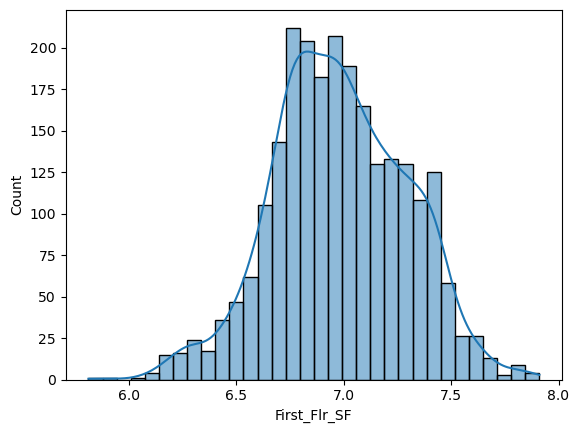

In [42]:
df_copy.First_Flr_SF.min()
df_copy['First_Flr_SF'] = np.log(df_copy['First_Flr_SF'])
sns.histplot(df_copy['First_Flr_SF'],kde=True)

###### Log function can't be applied on 0 values
###### Lot_Frontage,Total_Bsmt_SF,Second_Flr_SF describes the area in square-feet 
###### Therefore adding 1 sqft in each row won't make much difference

<Axes: xlabel='Lot_Frontage', ylabel='Count'>

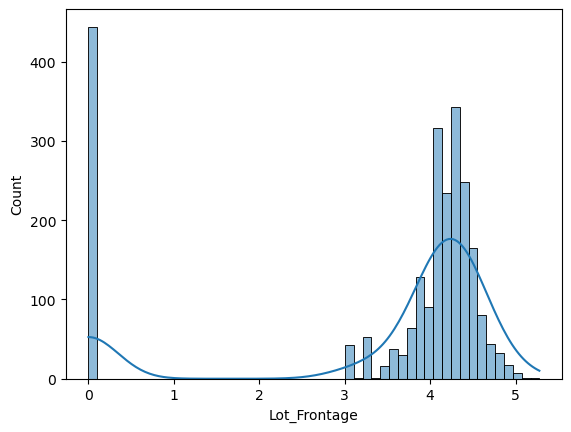

In [43]:
df_copy.Lot_Frontage.min()
df_copy['Lot_Frontage'] = np.log(df_copy['Lot_Frontage']+1)
sns.histplot(df_copy['Lot_Frontage'],kde=True)

<Axes: xlabel='Total_Bsmt_SF', ylabel='Count'>

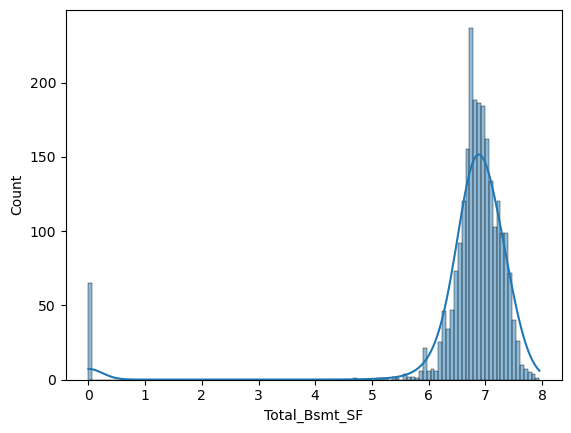

In [44]:
df_copy.Total_Bsmt_SF.min()
df_copy['Total_Bsmt_SF'] = np.log(df_copy['Total_Bsmt_SF']+1)
sns.histplot(df_copy['Total_Bsmt_SF'],kde=True)

<Axes: xlabel='Second_Flr_SF', ylabel='Count'>

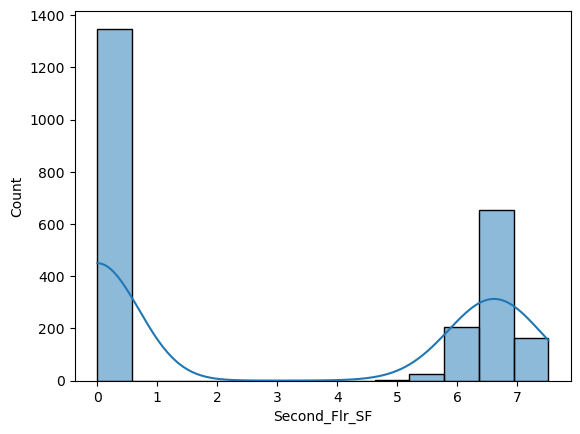

In [45]:
df_copy['Second_Flr_SF'] = np.log(df_copy['Second_Flr_SF']+1)
sns.histplot(df_copy['Second_Flr_SF'],kde=True)

### Normalizing Target Variable with Log transform method

In [46]:
df_copy['Sale_Price'] = np.log(df_copy['Sale_Price'])

<Axes: xlabel='Sale_Price', ylabel='Count'>

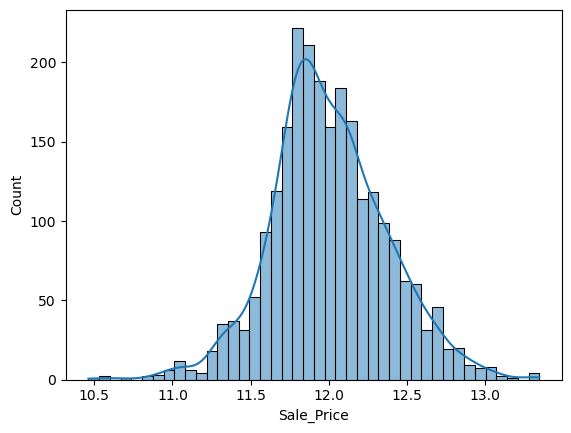

In [47]:
sns.histplot(df_copy['Sale_Price'],kde=True)

((array([-3.44149775, -3.19378426, -3.05657595, ...,  3.05657595,
          3.19378426,  3.44149775]),
  array([10.46310334, 10.5789798 , 10.59663473, ..., 13.32121424,
         13.32937755, 13.34550693])),
 (0.3664417778454414, 12.001168589331495, 0.9961503545047443))

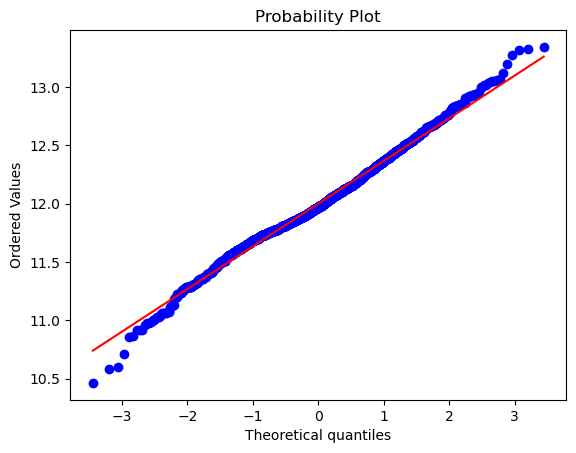

In [48]:
stats.probplot(df_copy['Sale_Price'], dist="norm", plot=pylab)

### Reduce cardinality of Categorical Variables
- Reduce 'Overall_Cond' into three categories that are Above Average, Average, and Below Avegrage.

In [49]:
df_copy["Overall_Cond"] = df_copy["Overall_Cond"].replace({
    'Good': 'Above_Average', 
    'Very_Good': 'Above_Average', 
    'Excellent': 'Above_Average', 
    'Fair': 'Below_Average',
    'Poor': 'Below_Average',
    'Very_Poor': 'Below_Average'
  }
)

<Axes: xlabel='Overall_Cond'>

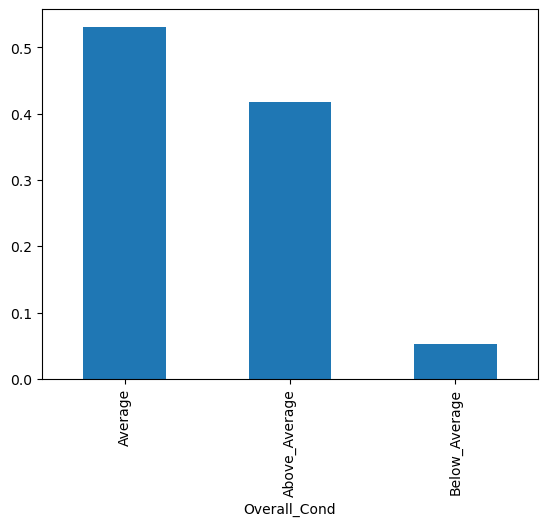

In [50]:
df_copy.Overall_Cond.value_counts(normalize=True).plot.bar()

### Categorical Variable encoding

In [51]:
df_cat = df_copy.select_dtypes(include='object')

In [52]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 0 to 2412
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bldg_Type     2396 non-null   object
 1   House_Style   2396 non-null   object
 2   Overall_Cond  2396 non-null   object
 3   Exter_Cond    2396 non-null   object
dtypes: object(4)
memory usage: 93.6+ KB


In [53]:
df_dummy = pd.get_dummies(df_cat, drop_first = True,dtype=int)

In [54]:
df_dummy.shape

(2396, 17)

In [55]:
df_copy.shape

(2396, 18)

In [56]:
# Add the results to the original housing dataframe
df_copy = pd.concat([df_copy, df_dummy], axis = 1)

In [57]:
df_copy

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,...,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Cond_Average,Overall_Cond_Below_Average,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
0,4.955827,10.366278,OneFam,One_Story,Average,1960,Typical,6.985642,7.412160,0.000000,...,0,0,0,0,1,0,0,0,0,1
1,4.394449,9.360655,OneFam,One_Story,Above_Average,1961,Typical,6.783325,6.797940,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,4.406719,9.565704,OneFam,One_Story,Above_Average,1958,Typical,7.192934,7.192182,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,4.543295,9.320091,OneFam,One_Story,Average,1968,Typical,7.654917,7.654443,0.000000,...,0,0,0,0,1,0,0,0,0,1
4,4.317488,9.534595,OneFam,Two_Story,Average,1997,Typical,6.834109,6.833032,6.553933,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,3.637586,8.979291,OneFam,SLvl,Above_Average,1984,Typical,6.911747,6.910751,0.000000,...,1,0,0,0,0,0,0,0,0,1
2409,0.000000,9.092120,OneFam,One_Story,Average,1983,Typical,6.762730,6.804615,0.000000,...,0,0,0,0,1,0,0,0,0,1
2410,4.143135,9.253496,OneFam,SFoyer,Average,1992,Typical,6.816736,6.877296,0.000000,...,0,0,0,0,1,0,0,0,0,1
2411,4.356709,9.211340,OneFam,One_Story,Average,1974,Typical,7.237059,7.236339,0.000000,...,0,0,0,0,1,0,0,0,0,1


In [58]:
df_copy.drop(['House_Style', 'Overall_Cond','Bldg_Type','Exter_Cond'],axis=1,inplace=True)

In [59]:
df_copy.shape

(2396, 31)

## Step 4: Data Transformation for Modeling

### Splitting the Data into Training and Testing Sets

In [60]:
from sklearn.model_selection import train_test_split

# Specify train and test data set and set random seed to one position

df_train, df_test = train_test_split(df_copy, train_size = 0.8, test_size = 0.2, random_state = 23108983)

In [61]:
df_train.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,...,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Cond_Average,Overall_Cond_Below_Average,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
1728,3.713572,8.476371,1916,7.087574,7.086738,0.000000,1,0,2,1,...,0,0,0,0,0,0,0,0,0,1
322,0.000000,9.132163,1992,7.055313,7.062192,0.000000,2,0,3,1,...,0,0,0,0,0,0,0,0,0,1
2332,4.219508,9.091219,1951,6.729824,7.106606,0.000000,1,0,2,1,...,0,0,0,0,1,0,0,0,0,1
1711,3.951244,8.719317,1920,6.845880,6.844815,6.354370,1,1,4,1,...,0,1,0,0,0,0,0,0,0,1
1338,3.218876,7.538495,1980,6.248043,6.246107,6.248043,1,0,2,1,...,0,1,0,0,0,0,0,0,0,1


### Rescaling the Features 

- Author will use MinMax scaling to rescale the features.
- MinMax will fit the values of all features between 0 and 1.
- MinMax will also fit an outliers between 0 and 1.

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
# Apply scaler() to all the columns except the 'dummy' variables

num_vars = ['Lot_Frontage', 'Lot_Area', 'Year_Built','Total_Bsmt_SF', 'First_Flr_SF', 
            'Second_Flr_SF','Full_Bath','Bedroom_AbvGr','Fireplaces','Longitude','Latitude','Sale_Price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,...,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Cond_Average,Overall_Cond_Below_Average,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
1728,0.719018,0.345187,0.321168,0.891068,0.586356,0.000000,0.333333,0,0.333333,1,...,0,0,0,0,0,0,0,0,0,1
322,0.000000,0.518484,0.875912,0.887012,0.574032,0.000000,0.666667,0,0.500000,1,...,0,0,0,0,0,0,0,0,0,1
2332,0.816976,0.507665,0.576642,0.846091,0.596332,0.000000,0.333333,0,0.333333,1,...,0,0,0,0,1,0,0,0,0,1
1711,0.765035,0.409387,0.350365,0.860682,0.464891,0.845458,0.333333,1,0.666667,1,...,0,1,0,0,0,0,0,0,0,1
1338,0.623235,0.097346,0.788321,0.785520,0.164289,0.831311,0.333333,0,0.333333,1,...,0,1,0,0,0,0,0,0,0,1


### Check the correlation coefficients

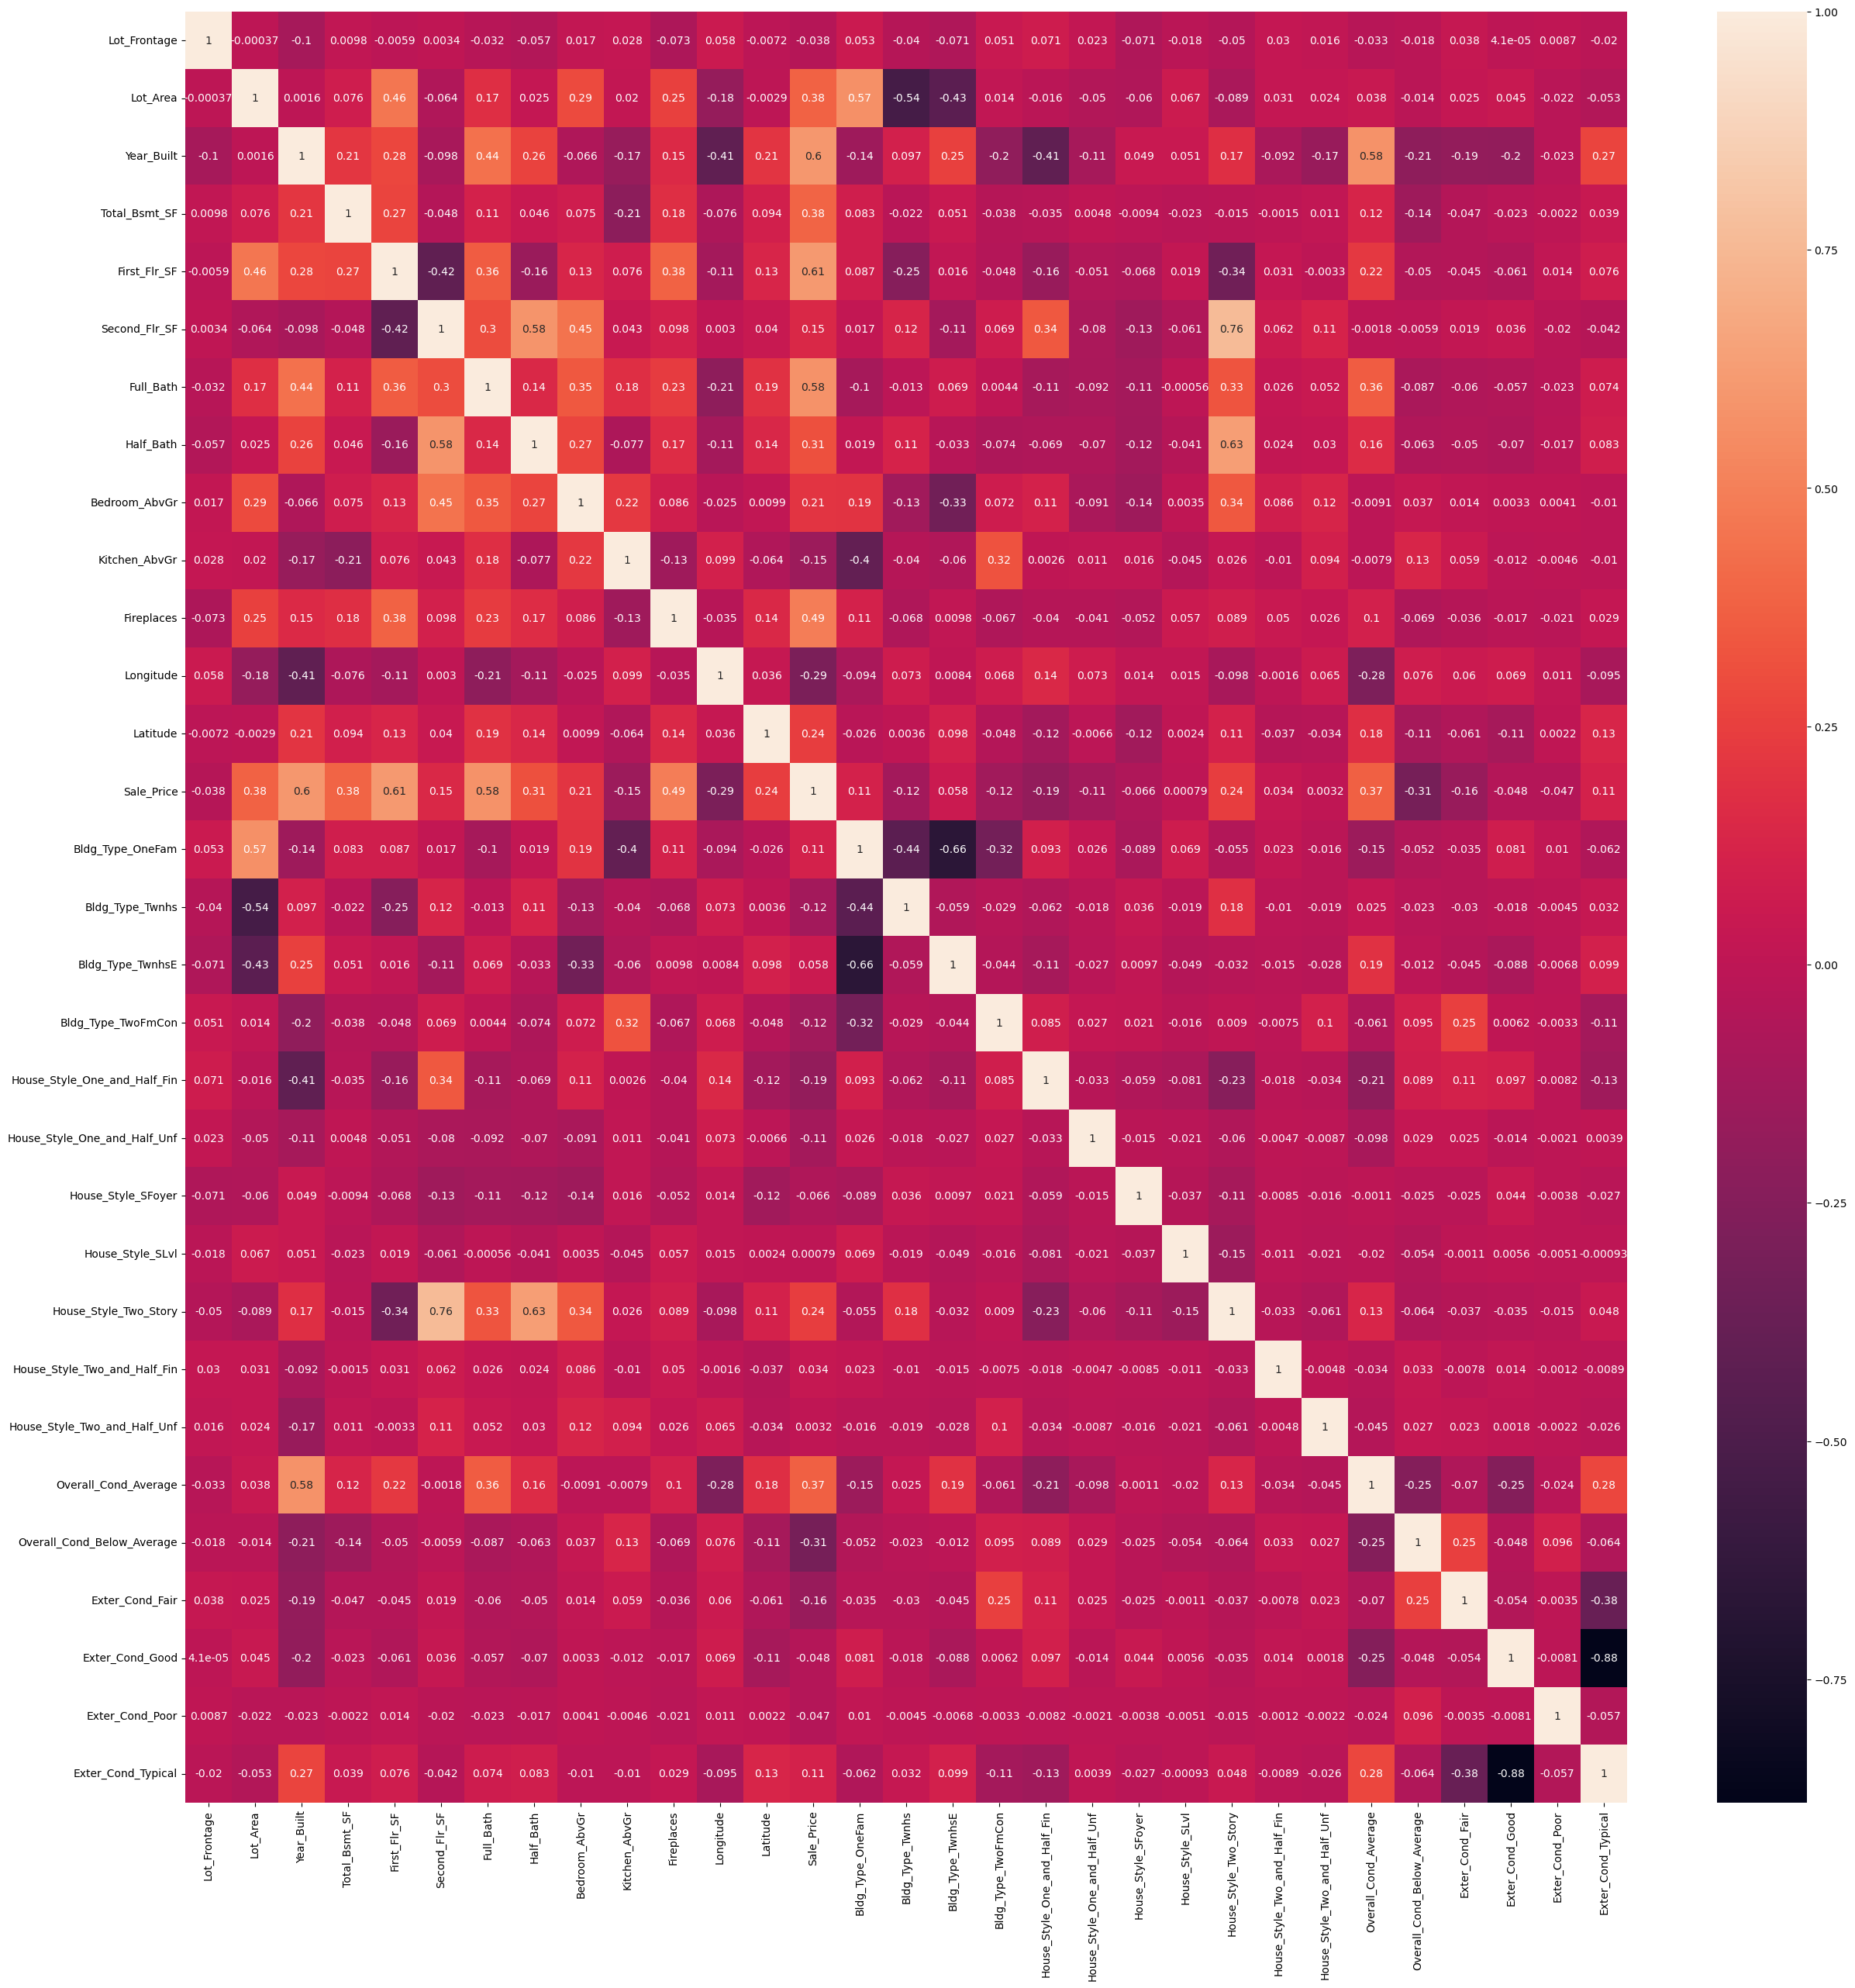

In [64]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Observation:
- Negative multicollinearity is been observed between Exter_Cond_Typical & Exter_Cond_Good
- Positive multicollinearity is been observed between Second_Flr_SF and House_Style_Two_Story
- Dropping variable with Multicollinearity.
- In next step Author will check P-value and VIF score of each variables to check multicollinearity and their significance and eliminate variables which are multicollinear and not significant for model

In [65]:
### Exter_Cond_Good explaning Target variable with very small number compare to Exter_Cond_Typical therefore dropped
df_train.drop('Exter_Cond_Good',axis=1,inplace=True)

In [66]:
### Second_Flr_SF explaning Target variable with very small number compare to House_Style_Two_Story therefore dropped
df_train.drop('Second_Flr_SF',axis=1,inplace=True)

### Dividing into X and Y sets for the model building

In [67]:
y_train = df_train.pop('Sale_Price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using statsmodels. Statsmodels need to explicitly fit a constant using sm.add_constant(X) because if Author don't perform this step, statsmodels fits a regression line passing through the origin, by default.

### Adding all the variables to the model (Backward Elimination Method)
- Check P-value in each iteration before dropping an insignificant varibale.
- Null Hypothesis: Variable is insignificant
- Alternative Hypothesis: Variable is significant
- Threshold to reject Null Hypothesis is Alpha=0.05
- If p value <= alpha then reject the null hypothesis
- Check VIF score in each iteration before droping variable
- If VIF>=5 then remove the variable

### Building model using statsmodels, for the detailed statistics

In [68]:
#Build a linear model

import statsmodels.api as sm
X_train_lr = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lr).fit()

In [69]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     371.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:09   Log-Likelihood:                 3043.9
No. Observations:                1916   AIC:                            -6030.
Df Residuals:                    1887   BIC:                            -5869.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,492.49
13,Bldg_Type_OneFam,15.47
15,Bldg_Type_TwnhsE,10.16
14,Bldg_Type_Twnhs,5.86
21,House_Style_Two_Story,3.92
9,Kitchen_AbvGr,3.60
3,Year_Built,3.19
5,First_Flr_SF,2.98
2,Lot_Area,2.95
6,Full_Bath,2.36


### Dropping the variable and updating the model 2
- Author will drop 'Bldg_Type_Twnhs' as it has very high P-value and high VIF which show statistical insignificance as well as high multicollinearity of feature.

In [71]:
# Dropping insignificant variable
X = X_train.drop('Bldg_Type_Twnhs', axis = 1)

In [72]:
# Build a third fitted model
X_train_lr = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lr).fit()

In [73]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     385.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:17   Log-Likelihood:                 3042.9
No. Observations:                1916   AIC:                            -6030.
Df Residuals:                    1888   BIC:                            -5874.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,200.31
13,Bldg_Type_OneFam,5.00
20,House_Style_Two_Story,3.86
3,Year_Built,3.19
5,First_Flr_SF,2.97
14,Bldg_Type_TwnhsE,2.71
2,Lot_Area,2.59
6,Full_Bath,2.35
7,Half_Bath,2.19
9,Kitchen_AbvGr,2.09


### Dropping the variable and updating the model 3
- Author will drop 'Bldg_Type_OneFam' as it has very high P-value and High VIF which shows statistical insignificance as well as Multicollinearity of feature.

In [75]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Bldg_Type_OneFam', axis = 1)

In [76]:
# Build a second fitted model
X_train_lr = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lr).fit()

In [77]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:25   Log-Likelihood:                 3042.6
No. Observations:                1916   AIC:                            -6031.
Df Residuals:                    1889   BIC:                            -5881.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,151.53
19,House_Style_Two_Story,3.86
3,Year_Built,3.15
5,First_Flr_SF,2.96
6,Full_Bath,2.35
7,Half_Bath,2.18
2,Lot_Area,1.85
8,Bedroom_AbvGr,1.80
15,House_Style_One_and_Half_Fin,1.77
22,Overall_Cond_Average,1.73


### Dropping the variable and updating the model 4
- Author will drop 'House_Style_One_and_Half_Unf' as it has very high P-value which shows statistical insignificance of feature.

In [79]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('House_Style_One_and_Half_Unf', axis = 1)

In [80]:
# Build a second fitted model
X_train_lr = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lr).fit()

In [81]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     416.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:34   Log-Likelihood:                 3042.4
No. Observations:                1916   AIC:                            -6033.
Df Residuals:                    1890   BIC:                            -5888.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,151.13
18,House_Style_Two_Story,3.84
3,Year_Built,3.13
5,First_Flr_SF,2.96
6,Full_Bath,2.35
7,Half_Bath,2.18
2,Lot_Area,1.84
8,Bedroom_AbvGr,1.79
15,House_Style_One_and_Half_Fin,1.76
21,Overall_Cond_Average,1.72


### Dropping the variable and updating the model 5
- Author will drop 'Bldg_Type_TwoFmCon' as it has high P-value which show statistical insignificance of feature.

In [83]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Bldg_Type_TwoFmCon', axis = 1)

In [84]:
# Build a second fitted model
X_train_lr = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lr).fit()

In [85]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     433.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:42   Log-Likelihood:                 3042.1
No. Observations:                1916   AIC:                            -6034.
Df Residuals:                    1891   BIC:                            -5895.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,148.22
17,House_Style_Two_Story,3.83
3,Year_Built,3.12
5,First_Flr_SF,2.95
6,Full_Bath,2.35
7,Half_Bath,2.18
2,Lot_Area,1.84
8,Bedroom_AbvGr,1.79
14,House_Style_One_and_Half_Fin,1.75
20,Overall_Cond_Average,1.72


### Dropping the variable and updating the model 6
- Author will drop 'Longitude' as it has high P-value which show statistical insignificance of feature.

In [87]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Longitude', axis = 1)

In [88]:
# Build a second fitted model
X_train_lr = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lr).fit()

In [89]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     452.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:47   Log-Likelihood:                 3041.3
No. Observations:                1916   AIC:                            -6035.
Df Residuals:                    1892   BIC:                            -5901.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,133.08
16,House_Style_Two_Story,3.83
5,First_Flr_SF,2.95
3,Year_Built,2.85
6,Full_Bath,2.35
7,Half_Bath,2.17
8,Bedroom_AbvGr,1.79
2,Lot_Area,1.78
13,House_Style_One_and_Half_Fin,1.75
19,Overall_Cond_Average,1.72


In [91]:
lr_6.params

const                          -0.001048
Lot_Frontage                    0.008924
Lot_Area                        0.157337
Year_Built                      0.226143
Total_Bsmt_SF                   0.091400
First_Flr_SF                    0.411550
Full_Bath                       0.068251
Half_Bath                       0.010668
Bedroom_AbvGr                  -0.071348
Kitchen_AbvGr                  -0.047893
Fireplaces                      0.068790
Latitude                        0.013903
Bldg_Type_TwnhsE                0.015239
House_Style_One_and_Half_Fin    0.071998
House_Style_SFoyer              0.020160
House_Style_SLvl                0.012355
House_Style_Two_Story           0.104751
House_Style_Two_and_Half_Fin    0.160365
House_Style_Two_and_Half_Unf    0.138335
Overall_Cond_Average           -0.019948
Overall_Cond_Below_Average     -0.088334
Exter_Cond_Fair                -0.033351
Exter_Cond_Poor                -0.100641
Exter_Cond_Typical             -0.014956
dtype: float64

### Observation:
- In 6th Itreation of model P-value is less than 0.05 and VIF score is less than 5

### Equation of best fitted line is:

$ SalePrice = 0.008924  \times  Lot Frontage + 0.157337  \times  Lot Area + 0.226143 \times Year Built + 0.091400 \times Total Bsmt SF + 0.411550 \times First Flr SF + 0.068251 \times Full Bath + 0.010668 \times Half Bath + (-0.071348) \times Bedroom AbvGr + (-0.047893) \times Kitchen AbvGr + 0.068790 \times Fireplaces + 0.013903 \times Latitude + 0.015239 \times Bldg Type TwnhsE + 0.071998 \times House Style One and Half Fin + 0.020160 \times House Style SFoyer + 0.012355 \times House Style SLvl + 0.104751 \times House Style Two Story + 0.104751 \times House Style Two and Half Fin + 0.138335 \times House Style Two and Half Unf + (-0.019948) \times Overall Cond Average + (-0.088334) \times Overall Cond Below Average + (-0.033351) \times Exter Cond Fair + (-0.100641) \times Exter Cond Poor + (-0.014956) \times Exter Cond Typical $

## Step 6: Gauss Markov Assumption Check
- Normal Distribution of Error terms
- No Autocorrelation in error terms
- Homoscedasticity of error term
- Assumption of Correct Functional Form (Linearity check)

### Normal Distribution of Error Terms

In [92]:
y_train_pred = lr_6.predict(X_train_lr)

In [93]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

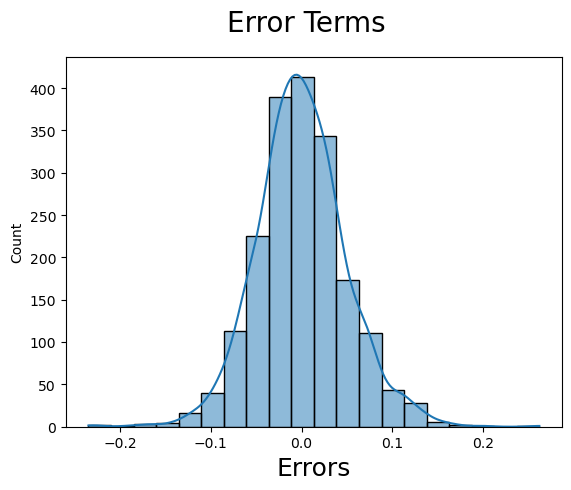

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()

sns.histplot((res), bins = 20,kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

((array([-3.38055163, -3.12868095, -2.98892908, ...,  2.98892908,
          3.12868095,  3.38055163]),
  array([-0.2347287 , -0.22378965, -0.1889426 , ...,  0.17475263,
          0.19990185,  0.26204787])),
 (0.04927912280486853, 2.6465639383434817e-16, 0.9944438866393238))

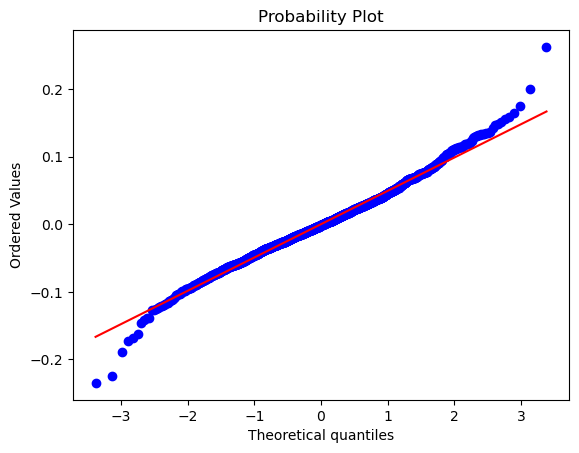

In [95]:
stats.probplot(res, dist="norm", plot=pylab)

In [96]:
### Shapiro-Wilk test to identify normality of error terms
### H0: Sample is drawn from Normal Distribution 
### H1: Sample is not drawn from Normal Distribution
### Alpha: 0.05
stat, pval = st.shapiro(res)

In [97]:
print('The test statistic is:',round(stat), 'and the P-value is:', round(pval))

The test statistic is: 1 and the P-value is: 0


### Observations:
- In Histogram and Q-Q plot Author can observe Errors are nearly normally distributed.
- P-value is less than alpha which means Null Hypothesis is rejected and conclude that residuals are not normally distributed.

### Auto Correlation

- Dubin Watson test statistics ranges between 0 to 4.
    - If test statistics is near 0 or 0 then it signifies presence of Positive Correlation
    - If test statistics is near 4 or 4 then it signifies presence of Negative Correlation
    - If test statistics is near 2 or 2 then it signifies there is no Auto-Correlation

In [98]:
res = y_train-y_train_pred

In [99]:
round(stt.durbin_watson(res))

2

### Observations:
- As test statistic is 2, Author concludes that there is no Auto-correlation.

### Homoscedasticity
- Hypothesis here is :
    - Ho: Error variance is constant(Homoscedasticity)
    - H1: Error variance is not constant(Heteroscedasticity)
    - alpha: 0.05

In [100]:
stats, pval, fstat, fpval = di.het_breuschpagan(res, X_train_lr)
# report.format(stats,pval)
print('Stats value is:',stats,', P-value is:',round(pval))

Stats value is: 140.16875944426482 , P-value is: 0


Text(0, 0.5, 'Residual')

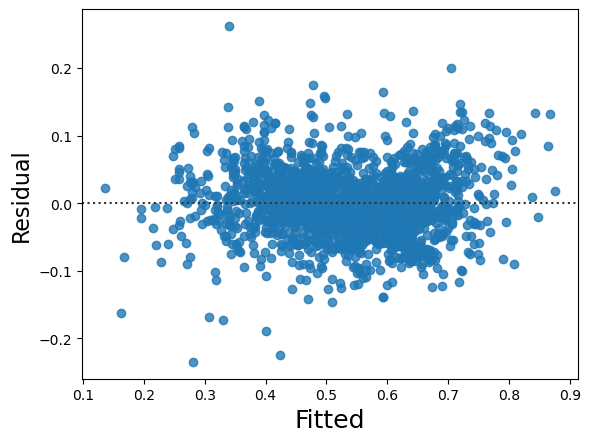

In [101]:
sns.residplot(x= y_train_pred, y= res)
fig.suptitle('Residual vs Fitted', fontsize = 20)
plt.xlabel('Fitted', fontsize = 18)
plt.ylabel('Residual', fontsize = 16)

### Observation:
- As P-value is less than alpha which means Null Hypothesis is rejected and concludes that Error variance is not constant
- Residual vs Fitted plot shows sligt Funnel-in pattern which indicates the heteroscedasticity. 

### Assumption of Correct Functional Form (Linearity check)

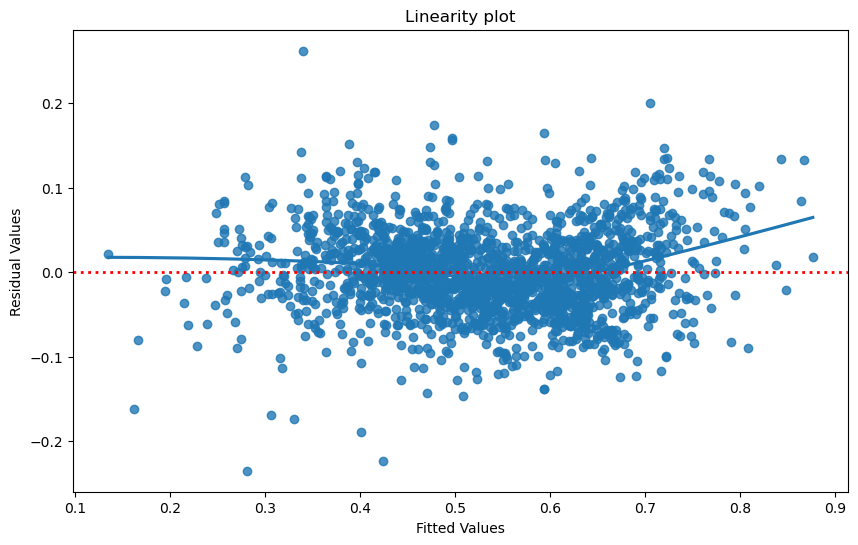

In [102]:
plt.figure(figsize=(10, 6))
sns.regplot(x= y_train_pred, y=res, lowess=True)
plt.axhline(y=0, color='red', linestyle=':', linewidth=2)
plt.title('Linearity plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

### Observation:
- Line is close to zero and nearly but at the end it some what diverges from horizontal which indicates changes in error variance.

## Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [103]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Lot_Frontage', 'Lot_Area', 'Year_Built','Total_Bsmt_SF', 'First_Flr_SF', 
            'Second_Flr_SF','Full_Bath','Bedroom_AbvGr','Fireplaces','Longitude','Latitude','Sale_Price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,...,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Cond_Average,Overall_Cond_Below_Average,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
463,0.811196,0.484338,0.956204,0.842433,0.391930,0.896205,0.666667,1,0.500000,1,...,0,1,0,0,1,0,0,0,0,1
1202,0.881716,0.518227,0.664234,0.863459,0.475996,0.000000,0.333333,0,0.500000,1,...,0,0,0,0,0,0,0,1,0,0
2350,0.795943,0.493069,0.496350,0.860815,0.584674,0.798497,0.333333,0,0.333333,1,...,0,0,0,0,1,0,0,0,0,1
1864,0.772343,0.434102,0.357664,0.801270,0.415484,0.847979,0.333333,0,0.500000,1,...,0,1,0,0,0,0,0,0,0,1
1236,0.792742,0.569751,0.883212,0.878253,0.535133,0.921461,0.666667,1,0.500000,1,...,0,1,0,0,1,0,0,0,0,1


In [104]:
y_test = df_test.pop('Sale_Price')
X_test = df_test

In [105]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [106]:
# Making predictions
y_test_pred = lr_6.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

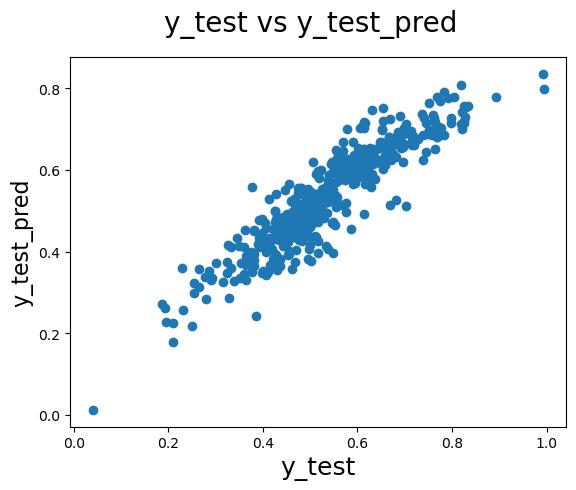

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

In [108]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_test_pred)

mse = mean_squared_error(y_true=y_test,y_pred=y_test_pred)

rmse = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

R2_Score = r2_score(y_test, y_test_pred)

In [109]:
print('Mean Absolute Error is:', mae)
print('Mean Squared Error is:', mse)
print('Root Mean Absolute Error is:', rmse)
print('R-sqaured score is:', R2_Score)

Mean Absolute Error is: 0.04080495370416611
Mean Squared Error is: 0.0028574718685896155
Root Mean Absolute Error is: 0.053455325914165144
R-sqaured score is: 0.8372814026073325
